In [ ]:
# import os
# import shutil
# import xml.etree.ElementTree as ET
# from PIL import Image
# from sklearn.model_selection import train_test_split

# # === CONFIG ===
# input_dir = '.'  # Folder where your sunX.jpg and sunX.xml files are
# output_dir = 'yolo_dataset'  # Output folder
# img_size = (640, 640)
# classes = ['sun']  # Define class list
# val_split = 0.2

# # === CREATE OUTPUT FOLDERS ===
# image_out = os.path.join(output_dir, 'images')
# label_out = os.path.join(output_dir, 'labels')
# for split in ['train', 'val']:
#     os.makedirs(os.path.join(image_out, split), exist_ok=True)
#     os.makedirs(os.path.join(label_out, split), exist_ok=True)



In [ ]:
# # Gather all image-xml pairs
# image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
# image_ids = list(set([
#     os.path.splitext(f)[0] for f in image_files
#     if os.path.exists(os.path.join(input_dir, os.path.splitext(f)[0] + '.xml'))
# ]))

# # Train/validation split
# train_ids, val_ids = train_test_split(image_ids, test_size=val_split, random_state=42)


In [ ]:
# def convert_box(size, box):
#     w_img, h_img = size
#     x_center = (box[0] + box[1]) / 2.0
#     y_center = (box[2] + box[3]) / 2.0
#     width = box[1] - box[0]
#     height = box[3] - box[2]
#     return [x_center / w_img, y_center / h_img, width / w_img, height / h_img]


In [ ]:
# def process_pair(img_id, split):
#     xml_path = os.path.join(input_dir, img_id + '.xml')
#     tree = ET.parse(xml_path)
#     root = tree.getroot()

#     # Match image
#     for ext in ['.jpg', '.jpeg', '.png']:
#         img_path = os.path.join(input_dir, img_id + ext)
#         if os.path.exists(img_path):
#             break
#     else:
#         print(f"❌ Image not found for {img_id}")
#         return

#     # Open and resize image
#     img = Image.open(img_path).convert('RGB')
#     original_size = img.size
#     img = img.resize(img_size, Image.Resampling.LANCZOS)
#     out_img_name = img_id + '.png'
#     img.save(os.path.join(image_out, split, out_img_name))

#     # Extract bounding boxes
#     label_lines = []
#     for obj in root.findall('object'):
#         cls_name = obj.find('name').text
#         if cls_name not in classes:
#             continue
#         cls_id = classes.index(cls_name)
#         xmlbox = obj.find('bndbox')
#         b = [int(xmlbox.find('xmin').text),
#              int(xmlbox.find('xmax').text),
#              int(xmlbox.find('ymin').text),
#              int(xmlbox.find('ymax').text)]

#         scaled = [b[0] * img_size[0] / original_size[0],
#                   b[1] * img_size[0] / original_size[0],
#                   b[2] * img_size[1] / original_size[1],
#                   b[3] * img_size[1] / original_size[1]]

#         bbox = convert_box(img_size, scaled)
#         label_lines.append(f"{cls_id} {' '.join(f'{x:.6f}' for x in bbox)}")

#     label_path = os.path.join(label_out, split, img_id + '.txt')
#     with open(label_path, 'w') as f:
#         f.write('\n'.join(label_lines))


In [ ]:
# for img_id in train_ids:
#     process_pair(img_id, 'train')

# for img_id in val_ids:
#     process_pair(img_id, 'val')

# print("✅ All images and labels processed.")


✅ All images and labels processed.


In [ ]:
# yaml_path = os.path.join(output_dir, 'data.yaml')

# with open(yaml_path, 'w') as f:
#     f.write(f"""path: {os.path.abspath(output_dir)}
# train: images/train
# val: images/val
# names:
#   0: sun
# """)

# print(f"✅ data.yaml created at {yaml_path}")


✅ data.yaml created at yolo_dataset\data.yaml


In [4]:
from ultralytics import YOLO

# Load a pretrained model (e.g., YOLOv8 nano for speed)
model = YOLO('yolo11n.pt')

# Train the model on your dataset
model.train(
    data='yolo_dataset/data.yaml',
    epochs=400,
    imgsz=640,
    batch=8,
    device=0  # or 'cpu' if you're not using GPU
)



New https://pypi.org/project/ultralytics/8.3.130 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.127  Python-3.9.19 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=400, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train26, nbs=64, nms=False, opset

train: Scanning C:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\labels\train.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 141.279.7 MB/s, size: 152.6 KB)


val: Scanning C:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\labels\val.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]


Plotting labels to c:\runs\detect\train26\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\runs\detect\train26
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400      1.12G      2.193      5.749       2.35          1        640: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          3          3    0.00222      0.667    0.00298    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400      1.12G      1.287      4.524      1.471          2        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          3          3    0.00222      0.667    0.00297    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400      1.13G      2.337      7.704      1.332          2        640: 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all          3          3    0.00222      0.667    0.00316     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      1.13G      1.193      6.736      1.108          0        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.73it/s]

                   all          3          3    0.00222      0.667    0.00305   0.000837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      1.17G     0.7137      6.234     0.8084          0        640: 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          3          3    0.00222      0.667    0.00207    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400      1.19G      1.232      4.628      1.412          1        640: 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          3          3    0.00222      0.667     0.0022   0.000875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400       1.2G     0.9356      6.148     0.8188          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.51it/s]

                   all          3          3    0.00222      0.667    0.00215   0.000982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400       1.2G     0.7096      6.315     0.6261          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.86it/s]

                   all          3          3    0.00222      0.667    0.00218    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400       1.2G      0.966      6.159      0.709          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]

                   all          3          3    0.00222      0.667    0.00226    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400       1.2G      1.714      3.899      1.303          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.33it/s]

                   all          3          3    0.00222      0.667    0.00213   0.000889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400      1.21G        1.6      4.345      1.268          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.97it/s]

                   all          3          3    0.00222      0.667    0.00188   0.000873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      1.22G      1.914      3.849      1.219          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3    0.00222      0.667    0.00188   0.000873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      1.23G      2.101      6.589      1.269          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.85it/s]

                   all          3          3    0.00222      0.667    0.00195   0.000929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      1.25G      1.244      3.352      1.054          2        640: 100%|██████████| 2/2 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3    0.00111      0.333    0.00098   0.000588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      1.26G      2.247      3.289      1.804          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3    0.00111      0.333    0.00098   0.000588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400      1.27G      1.721      3.376      1.112          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

                   all          3          3    0.00111      0.333   0.000933   0.000373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      1.29G       2.51      3.816      1.911          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.23it/s]

                   all          3          3    0.00222      0.667    0.00243   0.000489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      1.29G      1.248      4.843       1.07          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3    0.00222      0.667    0.00243   0.000489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      1.29G     0.8191      5.357     0.7324          0        640: 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          3          3    0.00135      0.333      0.168      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400      1.29G      2.292      3.376       1.74          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.50it/s]

                   all          3          3    0.00135      0.333      0.168      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      1.29G      1.727       2.72      1.355          4        640: 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          3          3      0.396      0.333      0.168     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400      1.29G      1.757        3.6      2.031          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.02it/s]

                   all          3          3      0.396      0.333      0.168     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400      1.29G      1.326       2.22      1.188          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3      0.416      0.277      0.187     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400      1.29G     0.7079      5.362     0.6768          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.96it/s]

                   all          3          3      0.416      0.277      0.187     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      1.29G      1.363      3.535      1.239          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.03it/s]

                   all          3          3      0.468      0.312      0.168     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      1.29G      1.571      3.458      1.387          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3      0.468      0.312      0.168     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      1.29G      1.433      3.374       1.35          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.88it/s]

                   all          3          3      0.468      0.312      0.168     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400      1.29G      1.284      3.777      1.137          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.72it/s]

                   all          3          3      0.482      0.333      0.168     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      1.29G       1.19      2.661      1.102          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.65it/s]

                   all          3          3      0.482      0.333      0.168     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400      1.29G      1.404      2.729      1.222          4        640: 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.79it/s]

                   all          3          3      0.283      0.333      0.335     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400      1.29G      1.633      2.792      1.682          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.29it/s]

                   all          3          3      0.283      0.333      0.335     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400      1.29G      1.938      3.495      1.198          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.67it/s]

                   all          3          3      0.283      0.333      0.335     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      1.29G      0.722      5.284      0.623          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.32it/s]

                   all          3          3    0.00333          1    0.00366   0.000735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400      1.29G      1.895      4.033      1.267          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.56it/s]

                   all          3          3    0.00333          1    0.00366   0.000735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400      1.29G      1.202      2.524       1.44          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.70it/s]

                   all          3          3    0.00333          1    0.00366   0.000735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      1.29G      2.291      2.579      2.151          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.56it/s]

                   all          3          3    0.00222      0.667      0.336     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      1.29G      1.883      2.909      1.503          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.30it/s]

                   all          3          3    0.00222      0.667      0.336     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      1.29G       1.56      3.649      1.366          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.25it/s]

                   all          3          3    0.00222      0.667      0.336     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400      1.29G     0.7176      5.347     0.8031          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3    0.00333          1     0.0053    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400      1.29G      1.543      2.461      1.247          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all          3          3    0.00333          1     0.0053    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      1.29G      1.155      2.628      1.362          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.70it/s]

                   all          3          3    0.00333          1     0.0053    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400      1.29G      1.611      2.729      1.583          2        640: 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3    0.00373      0.667      0.338     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      1.29G      1.901      4.029      2.056          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.14it/s]

                   all          3          3    0.00373      0.667      0.338     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400      1.29G      1.312      1.995      1.255          4        640: 100%|██████████| 2/2 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.99it/s]

                   all          3          3    0.00373      0.667      0.338     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      1.29G     0.7145      5.181     0.7463          0        640: 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]

                   all          3          3    0.00373      0.667      0.338     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      1.29G      1.075      2.231      1.078          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]

                   all          3          3    0.00222      0.667     0.0306     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      1.29G      1.314      2.364      1.471          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.31it/s]

                   all          3          3    0.00222      0.667     0.0306     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400      1.29G      1.237      2.327      1.221          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3    0.00222      0.667     0.0306     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400      1.29G      1.037      5.833      1.138          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.33it/s]

                   all          3          3    0.00222      0.667     0.0306     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      1.29G      1.284      2.261      1.266          2        640: 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]

                   all          3          3    0.00222      0.667      0.169     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      1.29G      2.106       3.63      2.475          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]

                   all          3          3    0.00222      0.667      0.169     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400      1.29G      1.403      3.084      1.206          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.84it/s]

                   all          3          3    0.00222      0.667      0.169     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      1.29G      1.649      3.089      1.281          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.31it/s]

                   all          3          3    0.00222      0.667      0.169     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400      1.29G      1.156      2.831      1.252          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.38it/s]

                   all          3          3    0.00296      0.667      0.337     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400      1.29G      1.609      3.579      1.687          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.49it/s]

                   all          3          3    0.00296      0.667      0.337     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400      1.29G     0.7351      4.915     0.8019          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.02it/s]

                   all          3          3    0.00296      0.667      0.337     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400      1.29G      1.836      2.687       1.95          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.01it/s]

                   all          3          3    0.00296      0.667      0.337     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      1.29G      1.012      2.317      1.181          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.18it/s]

                   all          3          3      0.738      0.333      0.336     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400      1.29G      1.999      2.405      1.906          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.42it/s]

                   all          3          3      0.738      0.333      0.336     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400      1.29G       1.34      3.046      1.346          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.79it/s]

                   all          3          3      0.738      0.333      0.336     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      1.29G      1.585      2.958     0.9709          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.77it/s]

                   all          3          3      0.738      0.333      0.336     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      1.29G      1.474      2.573      1.442          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.27it/s]

                   all          3          3      0.887      0.333      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      1.29G      1.199      1.789      1.238          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.71it/s]

                   all          3          3      0.887      0.333      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400      1.29G      2.416      3.744      1.869          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.01it/s]

                   all          3          3      0.887      0.333      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      1.29G      1.356      2.377      1.224          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]

                   all          3          3      0.887      0.333      0.336      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      1.29G       1.99      3.012      1.708          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.16it/s]

                   all          3          3       0.93      0.333      0.467      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400      1.29G      1.576      2.194      1.496          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.24it/s]

                   all          3          3       0.93      0.333      0.467      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      1.29G     0.5209      4.485     0.6282          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.53it/s]

                   all          3          3       0.93      0.333      0.467      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      1.29G       1.75       2.75      1.351          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.13it/s]

                   all          3          3       0.93      0.333      0.467      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      1.29G      1.617      2.178       1.26          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.67it/s]

                   all          3          3      0.881      0.333      0.555      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400      1.29G     0.5904      4.407     0.6266          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.19it/s]

                   all          3          3      0.881      0.333      0.555      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400      1.29G      1.259      3.579      1.714          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.74it/s]

                   all          3          3      0.881      0.333      0.555      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      1.29G      1.135      2.362      1.286          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          3          3      0.881      0.333      0.555      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      1.29G      1.192      2.302      1.386          2        640: 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.01it/s]

                   all          3          3      0.702      0.333      0.344     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400      1.29G      1.417      2.111      1.325          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.29it/s]

                   all          3          3      0.702      0.333      0.344     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400      1.29G      1.273       2.33      1.169          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.29it/s]

                   all          3          3      0.702      0.333      0.344     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      1.29G      1.806      3.741      2.012          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.10it/s]

                   all          3          3      0.702      0.333      0.344     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      1.29G      1.376      2.202      1.412          2        640: 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all          3          3      0.863      0.333       0.39      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400      1.29G      1.297      2.009      1.327          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.63it/s]

                   all          3          3      0.863      0.333       0.39      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400      1.29G      1.247      1.873       1.37          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all          3          3      0.863      0.333       0.39      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      1.29G     0.8027      4.471     0.7791          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.53it/s]

                   all          3          3      0.863      0.333       0.39      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      1.29G      1.486      3.367      1.649          1        640: 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]

                   all          3          3          1      0.629      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400      1.29G      1.765      2.032      1.231          3        640: 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.86it/s]

                   all          3          3          1      0.629      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      1.29G      1.398      2.506      1.287          2        640: 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all          3          3          1      0.629      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      1.29G      1.077       1.69       1.16          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          3          3          1      0.629      0.666      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      1.29G      1.268      1.936     0.9371          3        640: 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          3          3      0.928      0.333      0.336      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      1.29G       1.59      2.563       1.26          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.36it/s]

                   all          3          3      0.928      0.333      0.336      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400      1.29G      1.075      2.764      1.337          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.65it/s]

                   all          3          3      0.928      0.333      0.336      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      1.29G      1.738       2.42      1.642          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.53it/s]

                   all          3          3      0.928      0.333      0.336      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      1.29G      1.383      2.049      1.272          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.93it/s]

                   all          3          3      0.902      0.333      0.341      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      1.29G      1.351       2.23      1.422          2        640: 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          3          3      0.902      0.333      0.341      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400      1.29G     0.9605      2.351      1.305          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.39it/s]

                   all          3          3      0.902      0.333      0.341      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      1.29G     0.8731      1.698      1.091          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          3          3      0.902      0.333      0.341      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      1.29G      1.228      2.309      1.333          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all          3          3      0.944      0.667      0.775      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      1.29G     0.6129      4.217     0.7018          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all          3          3      0.944      0.667      0.775      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      1.29G       1.21      2.492      1.162          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.25it/s]

                   all          3          3      0.944      0.667      0.775      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      1.29G      1.132      1.503      1.132          4        640: 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]

                   all          3          3      0.944      0.667      0.775      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400      1.29G     0.9747      2.045      1.138          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.98it/s]

                   all          3          3      0.929      0.667      0.702      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400      1.29G     0.9254      2.199      1.193          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.56it/s]

                   all          3          3      0.929      0.667      0.702      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400      1.29G     0.9892      2.189      1.192          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3      0.929      0.667      0.702      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      1.29G      1.003      1.723      1.198          1        640: 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.24it/s]

                   all          3          3      0.929      0.667      0.702      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      1.29G      1.279      1.943      1.229          4        640: 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.09it/s]

                   all          3          3      0.949      0.333      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      1.29G      2.382      4.857       2.91          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.81it/s]

                   all          3          3      0.949      0.333      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400      1.29G      1.482      2.786      1.176          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.55it/s]

                   all          3          3      0.949      0.333      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      1.29G      0.578      3.862     0.6114          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.43it/s]

                   all          3          3      0.949      0.333      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      1.29G      1.095      2.127      1.194          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.40it/s]

                   all          3          3      0.809      0.333      0.353      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400      1.29G      1.047      2.691      1.289          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all          3          3      0.809      0.333      0.353      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400      1.29G      1.729      3.087      1.546          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.94it/s]

                   all          3          3      0.809      0.333      0.353      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      1.29G      1.481      1.759       1.21          2        640: 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.66it/s]

                   all          3          3      0.809      0.333      0.353      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400      1.29G     0.5834      4.041     0.6803          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.50it/s]

                   all          3          3      0.924      0.333      0.374      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400      1.29G      1.029      2.188      1.199          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.70it/s]

                   all          3          3      0.924      0.333      0.374      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400      1.29G     0.6568      3.793     0.6421          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.05it/s]

                   all          3          3      0.924      0.333      0.374      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400      1.29G      1.627      1.892      0.999          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.63it/s]

                   all          3          3      0.924      0.333      0.374      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      1.29G      1.061      3.006      1.073          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.67it/s]

                   all          3          3          1      0.616       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400      1.29G       1.89      2.078      1.111          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]

                   all          3          3          1      0.616       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400      1.29G     0.5069      3.619     0.5266          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.09it/s]

                   all          3          3          1      0.616       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      1.29G      1.009      1.688      1.202          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.67it/s]

                   all          3          3          1      0.616       0.67      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      1.29G      1.032      1.512      1.065          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.64it/s]

                   all          3          3      0.974      0.667      0.668      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400      1.29G      1.147      1.879      1.263          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3      0.974      0.667      0.668      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400      1.29G     0.6079      3.742     0.6138          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.29it/s]

                   all          3          3      0.974      0.667      0.668      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      1.29G      1.142      1.789      1.012          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all          3          3      0.974      0.667      0.668      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      1.29G     0.6673      3.872     0.6654          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.93it/s]

                   all          3          3       0.65      0.667      0.563      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400      1.29G      1.543      2.398      1.334          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3       0.65      0.667      0.563      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400      1.29G      1.285      2.159      1.585          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]

                   all          3          3       0.65      0.667      0.563      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      1.29G      1.032      1.835      1.296          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.49it/s]

                   all          3          3       0.65      0.667      0.563      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      1.29G      1.469      4.061      0.941          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all          3          3      0.653      0.667      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400      1.29G      1.063      1.662      1.081          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.68it/s]

                   all          3          3      0.653      0.667      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400      1.29G     0.9981      1.799      1.161          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.68it/s]

                   all          3          3      0.653      0.667      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      1.29G     0.8153      1.241     0.9717          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.66it/s]

                   all          3          3      0.653      0.667      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      1.29G     0.7413      3.938     0.6722          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3          1      0.646      0.666      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400      1.29G      1.339      2.428      1.106          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.42it/s]

                   all          3          3          1      0.646      0.666      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400      1.29G      1.457      1.672       1.17          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.58it/s]

                   all          3          3          1      0.646      0.666      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      1.29G      1.269      2.716      1.577          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all          3          3          1      0.646      0.666      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      1.29G     0.6203      3.707     0.6509          0        640: 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          3          3      0.965      0.333      0.335      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400      1.29G      1.188      1.938       1.32          2        640: 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all          3          3      0.965      0.333      0.335      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400      1.29G     0.8578      1.201      1.062          2        640: 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          3          3      0.965      0.333      0.335      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      1.29G      1.617      2.279       1.88          1        640: 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all          3          3      0.965      0.333      0.335      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      1.29G     0.9909      1.628      1.122          1        640: 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all          3          3      0.965      0.333      0.335      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400      1.29G      1.274       1.66      1.277          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3      0.965      0.333      0.335      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      1.29G      1.115      1.911      1.256          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          3          3      0.965      0.333      0.335      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      1.29G      1.308      1.747      1.568          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.34it/s]

                   all          3          3      0.965      0.333      0.335      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      1.29G      1.608       2.43      1.502          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]

                   all          3          3       0.96      0.333      0.336      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400      1.29G     0.8828      4.268     0.8082          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.14it/s]

                   all          3          3       0.96      0.333      0.336      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400      1.29G      1.911       2.88      2.168          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.42it/s]

                   all          3          3       0.96      0.333      0.336      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      1.29G      1.392       1.72      1.626          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.34it/s]

                   all          3          3       0.96      0.333      0.336      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      1.29G      1.318      1.799      1.157          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]

                   all          3          3       0.97      0.667      0.723      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      1.29G      1.356      1.648      1.259          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.96it/s]

                   all          3          3       0.97      0.667      0.723      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400      1.29G     0.9915      2.274      1.286          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.04it/s]

                   all          3          3       0.97      0.667      0.723      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      1.29G     0.8742      2.176      1.146          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all          3          3       0.97      0.667      0.723      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      1.29G      1.166      1.276      1.191          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3          1      0.651      0.727      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400      1.29G      1.103      2.028      1.435          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.32it/s]

                   all          3          3          1      0.651      0.727      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400      1.29G     0.9947       2.22      1.379          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.32it/s]

                   all          3          3          1      0.651      0.727      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      1.29G     0.9778      1.443     0.9516          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.22it/s]

                   all          3          3          1      0.651      0.727      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      1.29G      1.747      2.718      1.734          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.54it/s]

                   all          3          3      0.955      0.333        0.5       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400      1.29G     0.4518      3.147      0.543          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.36it/s]

                   all          3          3      0.955      0.333        0.5       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400      1.29G      1.324      1.576      1.495          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.66it/s]

                   all          3          3      0.955      0.333        0.5       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      1.29G     0.9901      1.635      1.013          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.29it/s]

                   all          3          3      0.955      0.333        0.5       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      1.29G     0.9859      1.255      1.046          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.85it/s]

                   all          3          3          1       0.97      0.995      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400      1.29G      1.197      2.486      1.561          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.40it/s]

                   all          3          3          1       0.97      0.995      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400      1.29G      1.046      1.481      1.151          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.93it/s]

                   all          3          3          1       0.97      0.995      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      1.29G      0.998      1.742      1.203          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.94it/s]

                   all          3          3          1       0.97      0.995      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      1.29G      1.101      1.637      1.297          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.62it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400      1.29G      1.312      1.392      1.257          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400      1.29G      0.671      3.332     0.7301          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.16it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400      1.29G      1.133       1.92      1.358          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.87it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      1.29G     0.8008       1.35      1.114          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all          3          3          1      0.972      0.995      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400      1.29G      1.398      1.545      1.313          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.68it/s]

                   all          3          3          1      0.972      0.995      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      1.29G      1.221      1.722      1.153          3        640: 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.69it/s]

                   all          3          3          1      0.972      0.995      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      1.29G     0.4019      3.095     0.5144          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.72it/s]

                   all          3          3          1      0.972      0.995      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      1.29G      1.306      1.743      1.535          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.48it/s]

                   all          3          3          1       0.65      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400      1.29G      1.215      1.546      1.216          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.95it/s]

                   all          3          3          1       0.65      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400      1.29G      1.247      1.494      1.502          3        640: 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.45it/s]

                   all          3          3          1       0.65      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      1.29G      1.846      2.446      1.036          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.72it/s]

                   all          3          3          1       0.65      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      1.29G     0.9641       1.35     0.9986          4        640: 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          3          3          1      0.652      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400      1.29G      1.445      2.051      1.627          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.56it/s]

                   all          3          3          1      0.652      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400      1.29G      1.192      1.607      1.206          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.89it/s]

                   all          3          3          1      0.652      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400      1.29G     0.7591      3.283     0.7709          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3          1      0.652      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400      1.29G      1.087      1.569      1.123          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.93it/s]

                   all          3          3      0.847      0.667      0.913      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400      1.29G       1.11      1.548       1.33          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.44it/s]

                   all          3          3      0.847      0.667      0.913      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400      1.29G      1.388      1.818      1.419          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]

                   all          3          3      0.847      0.667      0.913      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      1.29G      1.098      1.937      1.249          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.02it/s]

                   all          3          3      0.847      0.667      0.913      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      1.29G      1.321      2.014      1.484          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.87it/s]

                   all          3          3      0.981      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400      1.29G      1.346      1.523       1.55          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.95it/s]

                   all          3          3      0.981      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400      1.29G      1.203      1.812      1.581          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.92it/s]

                   all          3          3      0.981      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      1.29G     0.6143       3.38     0.6748          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.54it/s]

                   all          3          3      0.981      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      1.29G     0.4984      2.965     0.5414          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.17it/s]

                   all          3          3      0.975      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      1.29G     0.8147      1.408      1.132          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.43it/s]

                   all          3          3      0.975      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400      1.29G       1.07      1.299      1.361          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.00it/s]

                   all          3          3      0.975      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      1.29G      1.965      2.728      2.056          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.01it/s]

                   all          3          3      0.975      0.667      0.913      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      1.29G     0.6911      3.013     0.7139          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.00it/s]

                   all          3          3      0.978      0.667      0.863      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400      1.29G      1.024      1.795      1.316          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.56it/s]

                   all          3          3      0.978      0.667      0.863      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400      1.29G     0.6037      3.037     0.6987          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.48it/s]

                   all          3          3      0.978      0.667      0.863      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      1.29G     0.8767      1.316      1.171          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.97it/s]

                   all          3          3      0.978      0.667      0.863      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      1.29G     0.8288      1.395     0.9085          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.15it/s]

                   all          3          3      0.984      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      1.29G      1.246      1.613      1.256          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.25it/s]

                   all          3          3      0.984      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400      1.29G      1.462      1.869      1.523          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.07it/s]

                   all          3          3      0.984      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      1.29G      1.355      1.542      1.479          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.15it/s]

                   all          3          3      0.984      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      1.29G     0.7493      1.374     0.9461          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.14it/s]

                   all          3          3      0.986      0.667      0.689      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400      1.29G      1.317      1.548      1.005          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.24it/s]

                   all          3          3      0.986      0.667      0.689      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400      1.29G       1.23      1.498       1.42          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.62it/s]

                   all          3          3      0.986      0.667      0.689      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      1.29G     0.4922      2.862     0.5725          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3      0.986      0.667      0.689      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      1.29G     0.8941      1.167      1.052          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.84it/s]

                   all          3          3      0.977      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400      1.29G     0.9689      1.159      1.034          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.96it/s]

                   all          3          3      0.977      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      1.29G     0.7647      1.269      1.145          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.05it/s]

                   all          3          3      0.977      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      1.29G     0.5968      3.214     0.5343          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3      0.977      0.667      0.863      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      1.29G      1.165      1.519     0.9967          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3      0.977      0.667      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400      1.29G      1.719      1.857      1.676          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.16it/s]

                   all          3          3      0.977      0.667      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      1.29G     0.7431      1.174     0.9638          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.02it/s]

                   all          3          3      0.977      0.667      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400      1.29G     0.9107      1.215     0.9938          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3      0.977      0.667      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      1.29G      1.357      1.901      1.555          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.02it/s]

                   all          3          3      0.977      0.667      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400      1.29G     0.5108      2.729     0.5862          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.65it/s]

                   all          3          3      0.977      0.667      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400      1.29G     0.9215      1.821      1.205          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.38it/s]

                   all          3          3      0.977      0.667      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      1.29G     0.7896      1.265     0.9126          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]

                   all          3          3      0.977      0.667      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      1.29G      1.306      1.642      0.954          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.60it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      1.29G     0.9138      1.401      1.034          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.34it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400      1.29G     0.7357      1.017     0.8932          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.52it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400      1.29G     0.9272      1.284     0.8158          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      1.29G      1.021      1.431      1.274          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.61it/s]

                   all          3          3          1      0.971      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      1.29G     0.3642      2.623     0.4696          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.45it/s]

                   all          3          3          1      0.971      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400      1.29G     0.5611      2.884     0.6775          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.70it/s]

                   all          3          3          1      0.971      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      1.29G      1.086       1.31      1.134          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.86it/s]

                   all          3          3          1      0.971      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400      1.29G      1.452      1.613     0.9208          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3          1      0.972      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400      1.29G      1.136      1.036      1.064          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.61it/s]

                   all          3          3          1      0.972      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400      1.29G     0.7758      1.495      1.148          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.07it/s]

                   all          3          3          1      0.972      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      1.29G     0.8778      1.106      1.064          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3          1      0.972      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      1.29G      1.597      2.495      1.029          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.22it/s]

                   all          3          3          1      0.968      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      1.29G     0.7348      1.427      1.144          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          3          3          1      0.968      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400      1.29G     0.9565      1.596      1.088          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.58it/s]

                   all          3          3          1      0.968      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      1.29G      1.034      1.271      1.128          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.31it/s]

                   all          3          3          1      0.968      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      1.29G      1.114      1.876      1.201          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.45it/s]

                   all          3          3          1      0.964      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400      1.29G      1.154      1.372      1.421          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.32it/s]

                   all          3          3          1      0.964      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      1.29G     0.7496      1.155      1.103          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.37it/s]

                   all          3          3          1      0.964      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      1.29G     0.7312      1.112     0.9358          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3          1      0.964      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400      1.29G      0.423      2.705     0.5801          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.17it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400      1.29G      1.711       2.28      1.822          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.23it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400      1.29G     0.4454      2.608     0.5722          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      1.29G      1.363      2.211       1.42          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.56it/s]

                   all          3          3          1      0.973      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      1.29G     0.9353      1.655      1.134          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          3          3      0.984      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400      1.29G      1.079      1.268      1.218          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.30it/s]

                   all          3          3      0.984      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400      1.29G     0.9183     0.9903     0.9094          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.16it/s]

                   all          3          3      0.984      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      1.29G     0.6623       1.41       1.13          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.31it/s]

                   all          3          3      0.984      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      1.29G     0.8259      1.493     0.8537          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.36it/s]

                   all          3          3      0.974      0.667      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400      1.29G     0.8022      1.362      1.196          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.33it/s]

                   all          3          3      0.974      0.667      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400      1.29G     0.4494      2.663     0.4851          0        640: 100%|██████████| 2/2 [00:00<00:00, 16.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.17it/s]

                   all          3          3      0.974      0.667      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      1.29G     0.6107     0.9994     0.8805          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.30it/s]

                   all          3          3      0.974      0.667      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      1.29G      1.066      1.384      1.123          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.47it/s]

                   all          3          3      0.975      0.667      0.913      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400      1.29G     0.5106      2.761     0.5973          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.09it/s]

                   all          3          3      0.975      0.667      0.913      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400      1.29G      0.765      1.156     0.9715          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.08it/s]

                   all          3          3      0.975      0.667      0.913      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      1.29G     0.9338      2.222      1.081          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.01it/s]

                   all          3          3      0.975      0.667      0.913      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      1.29G     0.6537     0.9366     0.9059          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.59it/s]

                   all          3          3      0.969      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400      1.29G      1.292      1.491     0.9875          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.58it/s]

                   all          3          3      0.969      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400      1.29G     0.8128      1.187      1.088          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all          3          3      0.969      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      1.29G     0.8889     0.9436       0.97          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3      0.969      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      1.29G     0.8081      1.114     0.9894          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.31it/s]

                   all          3          3      0.975      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      1.29G      1.179      1.485      1.552          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3      0.975      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400      1.29G     0.9773      1.162      1.172          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3      0.975      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      1.29G     0.8145      1.409      1.209          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.99it/s]

                   all          3          3      0.975      0.667      0.863      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      1.29G      0.992      1.563      1.417          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3      0.975      0.667       0.83      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400      1.29G     0.6015      2.732     0.5492          0        640: 100%|██████████| 2/2 [00:00<00:00, 16.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.95it/s]

                   all          3          3      0.975      0.667       0.83      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400      1.29G      0.838      1.116      1.087          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3      0.975      0.667       0.83      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      1.29G     0.7071      1.115     0.8786          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.38it/s]

                   all          3          3      0.975      0.667       0.83      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      1.29G      0.978      1.355      1.375          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3      0.974      0.667       0.83      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      1.29G     0.8487      1.118      1.044          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.73it/s]

                   all          3          3      0.974      0.667       0.83      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400      1.29G     0.7154     0.8897     0.9392          4        640: 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.42it/s]

                   all          3          3      0.974      0.667       0.83      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      1.29G      1.029      1.942      1.398          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]

                   all          3          3      0.974      0.667       0.83      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      1.29G      1.279      1.594      1.163          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.35it/s]

                   all          3          3      0.976      0.667      0.775      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400      1.29G     0.7206      1.174     0.9725          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.29it/s]

                   all          3          3      0.976      0.667      0.775      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400      1.29G      1.005       1.17      1.022          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.00it/s]

                   all          3          3      0.976      0.667      0.775      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      1.29G      1.084      1.277      1.435          3        640: 100%|██████████| 2/2 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.87it/s]

                   all          3          3      0.976      0.667      0.775      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      1.29G      1.027      1.657      1.189          4        640: 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.29it/s]

                   all          3          3      0.977      0.667      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      1.29G     0.7837      1.018      1.047          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.73it/s]

                   all          3          3      0.977      0.667      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400      1.29G     0.8008       1.02      1.002          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3      0.977      0.667      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      1.29G     0.7275     0.9558     0.9382          2        640: 100%|██████████| 2/2 [00:00<00:00, 14.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.04it/s]

                   all          3          3      0.977      0.667      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      1.29G     0.7352      1.026      1.079          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.27it/s]

                   all          3          3          1      0.973      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400      1.29G     0.4615      2.461     0.5649          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]

                   all          3          3          1      0.973      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400      1.29G      1.001      1.183     0.9815          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all          3          3          1      0.973      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      1.29G     0.7845      1.432       1.16          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all          3          3          1      0.973      0.995      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/400      1.29G     0.6755       1.05      1.041          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.15it/s]

                   all          3          3          1      0.981      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/400      1.29G      1.046      1.472     0.8907          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.93it/s]

                   all          3          3          1      0.981      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/400      1.29G     0.7668      1.117      1.095          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.98it/s]

                   all          3          3          1      0.981      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/400      1.29G     0.4422      2.329     0.5017          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]

                   all          3          3          1      0.981      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/400      1.29G     0.7414      1.382      1.089          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.88it/s]

                   all          3          3          1       0.98      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/400      1.29G     0.6369     0.9586      1.051          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.85it/s]

                   all          3          3          1       0.98      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/400      1.29G      1.238      1.179      1.204          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.08it/s]

                   all          3          3          1       0.98      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/400      1.29G     0.4221      2.333     0.5288          0        640: 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.20it/s]

                   all          3          3          1       0.98      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/400      1.29G     0.7312       1.35      1.114          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.79it/s]

                   all          3          3          1      0.982      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/400      1.29G     0.7416     0.9786      0.925          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.15it/s]

                   all          3          3          1      0.982      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/400      1.29G     0.3954      2.275     0.5334          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.38it/s]

                   all          3          3          1      0.982      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/400      1.29G      1.668       2.15      1.008          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.14it/s]

                   all          3          3          1      0.982      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/400      1.29G     0.7674      1.344       1.07          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all          3          3          1      0.985      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/400      1.29G      1.148       1.77      1.053          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3          1      0.985      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/400      1.29G          1      1.355     0.8966          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.82it/s]

                   all          3          3          1      0.985      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/400      1.29G     0.3156      2.198      0.463          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.01it/s]

                   all          3          3          1      0.985      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/400      1.29G     0.7982      1.024      1.088          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.93it/s]

                   all          3          3          1      0.986      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/400      1.29G     0.2858      2.345     0.4862          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.66it/s]

                   all          3          3          1      0.986      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/400      1.29G     0.7105     0.9256     0.9695          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.12it/s]

                   all          3          3          1      0.986      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/400      1.29G     0.4054      2.175     0.4555          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.17it/s]

                   all          3          3          1      0.986      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/400      1.29G      1.617      2.232      1.809          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.70it/s]

                   all          3          3          1      0.982      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/400      1.29G       1.62       2.49      1.708          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.76it/s]

                   all          3          3          1      0.982      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/400      1.29G     0.8838     0.9408      1.087          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.00it/s]

                   all          3          3          1      0.982      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/400      1.29G     0.3998      2.125     0.5048          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3          1      0.982      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/400      1.29G      1.295      2.396     0.7498          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.28it/s]

                   all          3          3          1      0.979      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/400      1.29G     0.7717      1.304     0.9805          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.96it/s]

                   all          3          3          1      0.979      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/400      1.29G      1.109      1.219      1.382          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.27it/s]

                   all          3          3          1      0.979      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/400      1.29G     0.7415      1.332     0.9487          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.67it/s]

                   all          3          3          1      0.979      0.995      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/400      1.29G     0.9143      1.405      1.175          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.30it/s]

                   all          3          3          1      0.982      0.995      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/400      1.29G     0.4475      2.199     0.5499          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.34it/s]

                   all          3          3          1      0.982      0.995      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/400      1.29G      1.222      1.181      1.062          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.73it/s]

                   all          3          3          1      0.982      0.995      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/400      1.29G     0.8985      1.768      1.262          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.60it/s]

                   all          3          3          1      0.982      0.995      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/400      1.29G        1.4      1.624      1.152          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3          1      0.986      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/400      1.29G     0.6184     0.9227     0.9998          3        640: 100%|██████████| 2/2 [00:00<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]

                   all          3          3          1      0.986      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/400      1.29G     0.8862      1.159      1.037          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.68it/s]

                   all          3          3          1      0.986      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/400      1.29G      1.104       1.41      1.061          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.41it/s]

                   all          3          3          1      0.986      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/400      1.29G     0.4335      2.289     0.5247          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.70it/s]

                   all          3          3          1      0.991      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/400      1.29G     0.8639      1.228      1.042          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.53it/s]

                   all          3          3          1      0.991      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/400      1.29G     0.7344      1.171     0.9727          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.57it/s]

                   all          3          3          1      0.991      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/400      1.29G     0.6571     0.9951     0.8892          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.90it/s]

                   all          3          3          1      0.991      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/400      1.29G     0.4643      2.349     0.6261          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.67it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/400      1.29G     0.8074      1.125      1.066          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.17it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/400      1.29G     0.9994      1.464       1.35          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.13it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/400      1.29G     0.8335      1.028     0.9613          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.00it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/400      1.29G      1.078      1.019      1.163          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.30it/s]

                   all          3          3          1      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/400      1.29G     0.8298      1.104      1.232          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.37it/s]

                   all          3          3          1      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/400      1.29G     0.9459      1.347      1.363          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.53it/s]

                   all          3          3          1      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/400      1.29G     0.7917     0.9625      1.043          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.32it/s]

                   all          3          3          1      0.994      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/400      1.29G       1.49      1.888      1.628          3        640: 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.31it/s]

                   all          3          3          1      0.984      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/400      1.29G     0.3763      2.189     0.5371          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all          3          3          1      0.984      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/400      1.29G     0.6327     0.9549      1.015          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.60it/s]

                   all          3          3          1      0.984      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/400      1.29G     0.4115      2.254     0.5506          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.54it/s]

                   all          3          3          1      0.984      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/400      1.29G     0.3611      2.146     0.5337          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.25it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/400      1.29G     0.7659     0.8731     0.9535          4        640: 100%|██████████| 2/2 [00:00<00:00, 14.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.01it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/400      1.29G     0.8108      1.212      1.085          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.98it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/400      1.29G     0.3559      2.159     0.4858          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.69it/s]

                   all          3          3          1      0.986      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/400      1.29G     0.7769     0.8366     0.8733          4        640: 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all          3          3          1       0.99      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/400      1.29G      0.659     0.8401     0.9055          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.66it/s]

                   all          3          3          1       0.99      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/400      1.29G     0.3421      2.158     0.4314          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.01it/s]

                   all          3          3          1       0.99      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/400      1.29G      1.373      2.118      1.901          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.02it/s]

                   all          3          3          1       0.99      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/400      1.29G     0.8304      1.255      1.185          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.65it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/400      1.29G     0.7765      1.427      1.047          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.99it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/400      1.29G     0.3763      2.081     0.4869          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.67it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/400      1.29G     0.3562      2.191     0.5292          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.70it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/400      1.29G     0.4228      2.159      0.574          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.51it/s]

                   all          3          3          1      0.995      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/400      1.29G     0.3134      2.062      0.533          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.75it/s]

                   all          3          3          1      0.995      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/400      1.29G     0.4321      2.133     0.5373          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.16it/s]

                   all          3          3          1      0.995      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/400      1.29G     0.8629      1.372      1.158          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          3          3          1      0.995      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/400      1.29G      0.724      0.908     0.9785          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.55it/s]

                   all          3          3          1      0.998      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/400      1.29G     0.4223       2.08      0.488          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.75it/s]

                   all          3          3          1      0.998      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/400      1.29G     0.7821     0.9236     0.9796          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.06it/s]

                   all          3          3          1      0.998      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/400      1.29G      1.023       1.32      1.056          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.45it/s]

                   all          3          3          1      0.998      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/400      1.29G     0.8569     0.8578     0.9989          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3          1      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/400      1.29G      0.794      1.246      1.105          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.38it/s]

                   all          3          3          1      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/400      1.29G     0.6065      1.034     0.9172          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.81it/s]

                   all          3          3          1      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/400      1.29G     0.7527      1.329      1.162          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.47it/s]

                   all          3          3          1      0.995      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/400      1.29G     0.6744       1.15      1.027          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          3          3          1      0.993      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/400      1.29G     0.6911     0.8754     0.9977          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.50it/s]

                   all          3          3          1      0.993      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/400      1.29G      1.224       1.46      1.253          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.08it/s]

                   all          3          3          1      0.993      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/400      1.29G     0.6622      1.024     0.9414          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.02it/s]

                   all          3          3          1      0.993      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/400      1.29G     0.8024      1.308      1.152          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.24it/s]

                   all          3          3          1      0.994      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/400      1.29G      1.072      1.579      1.381          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.27it/s]

                   all          3          3          1      0.994      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/400      1.29G     0.5201     0.8897     0.8639          3        640: 100%|██████████| 2/2 [00:00<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.98it/s]

                   all          3          3          1      0.994      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/400      1.29G     0.7463      1.309      1.061          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.11it/s]

                   all          3          3          1      0.994      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/400      1.29G     0.6459     0.8936     0.8373          1        640: 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.02it/s]

                   all          3          3          1      0.992      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/400      1.29G     0.4368      2.169     0.5471          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.26it/s]

                   all          3          3          1      0.992      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/400      1.29G     0.7817      1.202      1.182          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all          3          3          1      0.992      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/400      1.29G      1.223      1.563      1.639          2        640: 100%|██████████| 2/2 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.41it/s]

                   all          3          3          1      0.992      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/400      1.29G     0.7046     0.8846     0.8713          3        640: 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all          3          3          1      0.992      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/400      1.29G     0.7725     0.9134     0.8962          3        640: 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.98it/s]

                   all          3          3          1      0.992      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/400      1.29G     0.8266      1.313      1.073          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          3          3          1      0.992      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/400      1.29G     0.8329      1.115      1.217          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.25it/s]

                   all          3          3          1      0.992      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/400      1.29G     0.4011      2.108     0.4958          0        640: 100%|██████████| 2/2 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/400      1.29G     0.6622     0.9871     0.9857          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.17it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/400      1.29G      1.093     0.9691      1.155          2        640: 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.16it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/400      1.29G     0.5567     0.8503     0.9018          4        640: 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.31it/s]

                   all          3          3          1      0.993      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/400      1.29G     0.6164       1.02     0.9767          3        640: 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.52it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/400      1.29G     0.9996      1.041     0.8516          3        640: 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.74it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/400      1.29G      1.256      1.416      1.106          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.98it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/400      1.29G     0.4617       2.19      0.559          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/400      1.29G      1.437      1.978      2.018          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.08it/s]

                   all          3          3          1      0.992      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/400      1.29G      1.929      2.617      1.927          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.87it/s]

                   all          3          3          1      0.992      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/400      1.29G      0.881      2.458     0.9769          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.29it/s]

                   all          3          3          1      0.992      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/400      1.29G     0.8581      1.303      1.284          2        640: 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.21it/s]

                   all          3          3          1      0.992      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/400      1.29G     0.9927      0.865      1.001          4        640: 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.32it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/400      1.29G     0.5206     0.8621     0.8113          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.90it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/400      1.29G     0.5904      0.961     0.9964          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.08it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/400      1.29G      0.304      2.034     0.5033          0        640: 100%|██████████| 2/2 [00:00<00:00, 15.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.16it/s]

                   all          3          3          1      0.993      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/400      1.29G     0.9187      1.064      1.267          1        640: 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.60it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/400      1.29G     0.3846      2.045     0.5145          0        640: 100%|██████████| 2/2 [00:00<00:00, 14.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.73it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/400      1.29G     0.2985      2.246     0.4248          0        640: 100%|██████████| 2/2 [00:00<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.52it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/400      1.29G     0.5995     0.8994          1          4        640: 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.66it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/400      1.29G     0.8428      1.362      1.336          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          3          3          1      0.996      0.995      0.698


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/400      1.29G     0.6843      1.401      1.108          1        640: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/400      1.29G     0.5668      1.381     0.9947          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.40it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/400      1.29G     0.4902     0.8276     0.8855          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.52it/s]

                   all          3          3          1      0.996      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/400      1.29G     0.5386       0.83     0.9385          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.77it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/400      1.29G     0.7041      1.689     0.8063          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.24it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/400      1.29G     0.9407      1.226     0.8918          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.83it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/400      1.29G     0.4926      0.896     0.9066          1        640: 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.40it/s]

                   all          3          3          1      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/400      1.29G     0.7574      1.178     0.9219          1        640: 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.95it/s]

                   all          3          3      0.997          1      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/400      1.29G     0.8146      1.132     0.8974          1        640: 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.39it/s]

                   all          3          3      0.997          1      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/400      1.29G     0.5119     0.9475      1.023          1        640: 100%|██████████| 2/2 [00:00<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.98it/s]

                   all          3          3      0.997          1      0.995      0.698



400 epochs completed in 0.057 hours.
Optimizer stripped from c:\runs\detect\train26\weights\last.pt, 5.5MB
Optimizer stripped from c:\runs\detect\train26\weights\best.pt, 5.5MB

Validating c:\runs\detect\train26\weights\best.pt...
Ultralytics 8.3.127  Python-3.9.19 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.36it/s]


                   all          3          3          1      0.991      0.995      0.797
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to c:\runs\detect\train26


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D0FEEE6E50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
# import torch, torchvision
# print(torch.__version__)
# print(torchvision.__version__)
# print(torch.cuda.is_available())  # Should be True if using GPU


2.6.0+cu124
0.21.0+cu124
True


In [ ]:
# # Plot training results
# model.val()  # Evaluate performance on validation set


Ultralytics 8.3.127  Python-3.9.19 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 1745.71079.2 MB/s, size: 152.6 KB)


val: Scanning C:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\labels\val.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


                   all          3          3          1      0.978      0.995      0.665
Speed: 2.5ms preprocess, 27.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to c:\runs\detect\train152


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023313277220>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480


image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun1.png: 640x640 1 sun, 12.3ms
Speed: 3.1ms preprocess, 12.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun2.png: 640x640 1 sun, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun9.png: 640x640 1 sun, 11.8ms
Speed: 3.3ms preprocess, 11.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


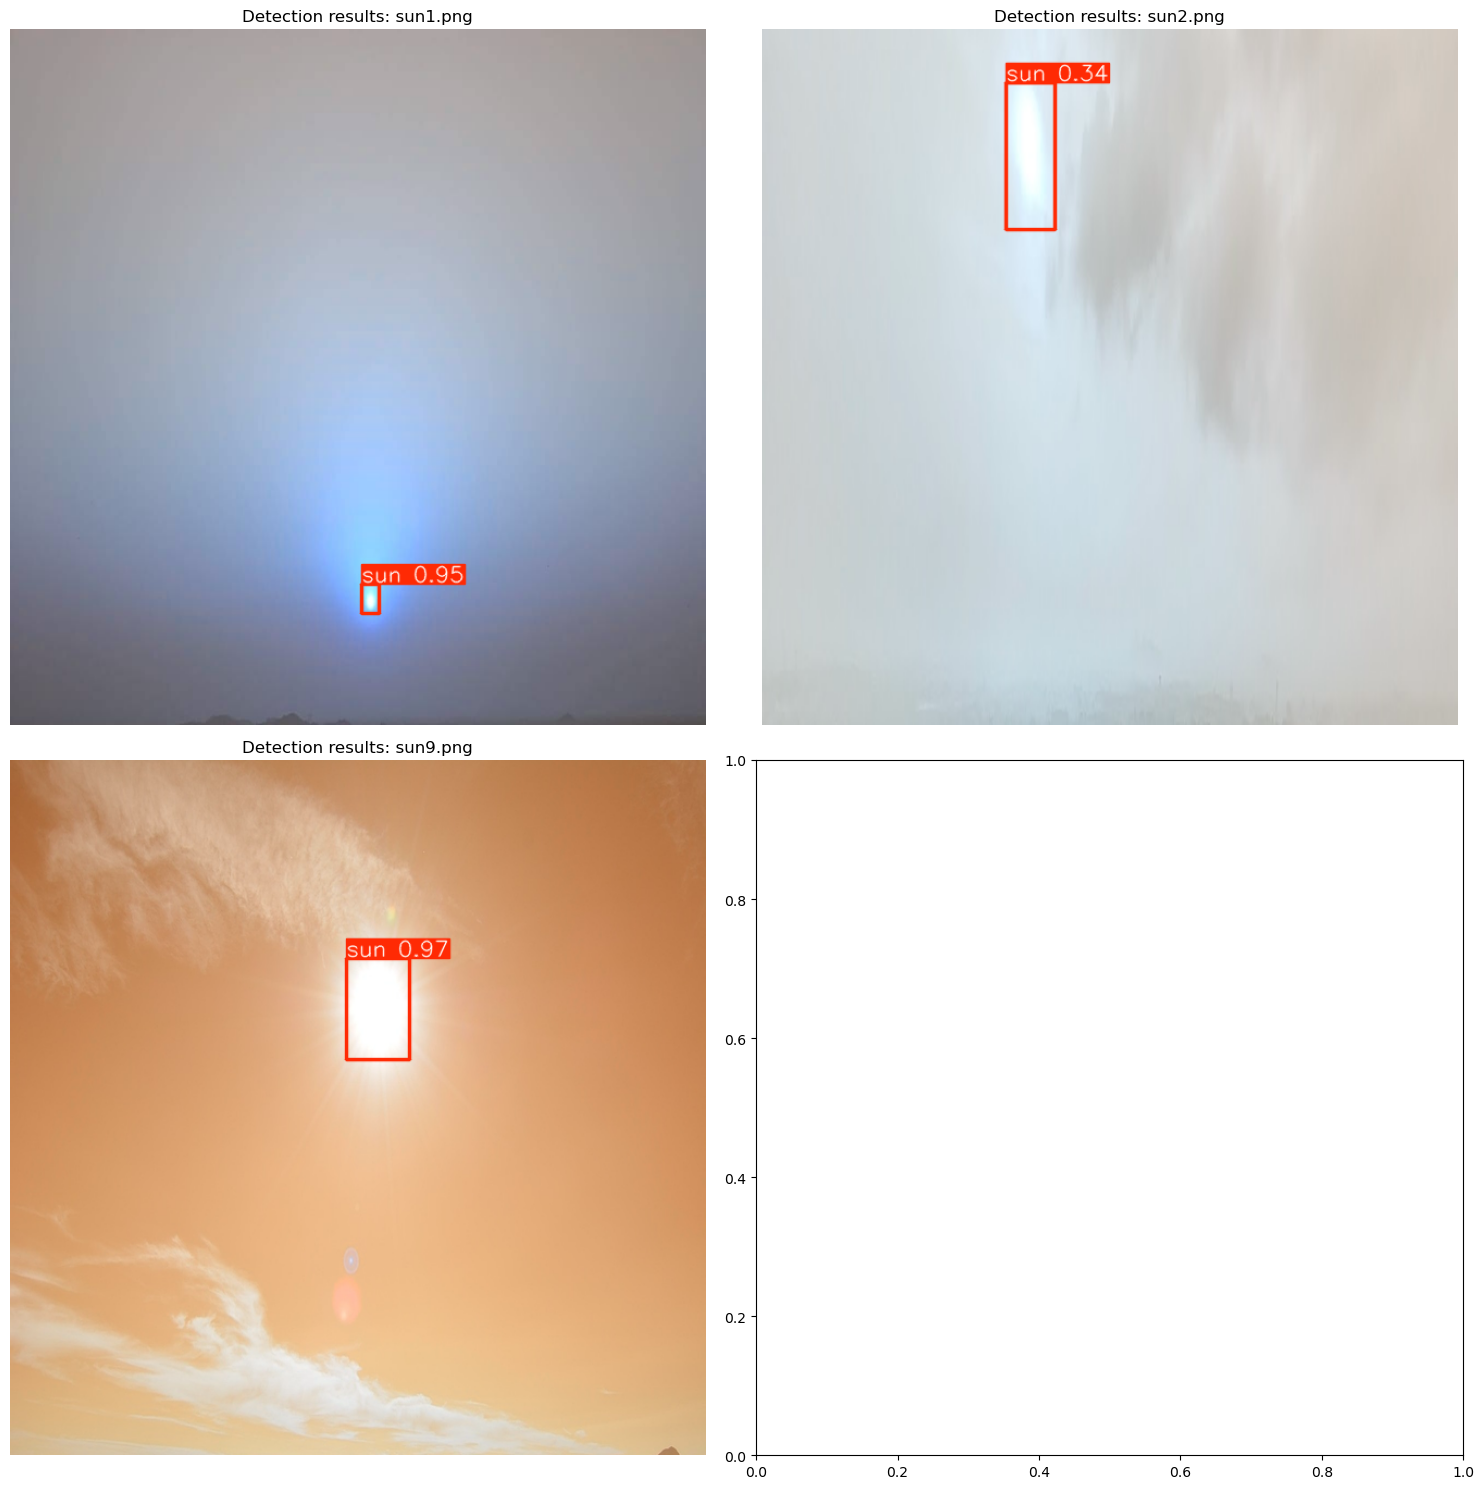

In [ ]:
# ...existing code...

# %%
# Visualize predictions on validation data
from pathlib import Path
import matplotlib.pyplot as plt
output_dir = 'yolo_dataset'
# Get a few validation images
val_img_dir = Path(output_dir) / 'images' / 'val'
val_images = list(val_img_dir.glob('*.png'))[:4]  # Get first 4 validation images

# Create a subplot for each image
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, img_path in enumerate(val_images):
    # Get predictions
    results = model.predict(str(img_path))
    
    # Plot the result
    res_plotted = results[0].plot()
    axes[idx].imshow(res_plotted)
    axes[idx].set_title(f'Detection results: {img_path.name}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

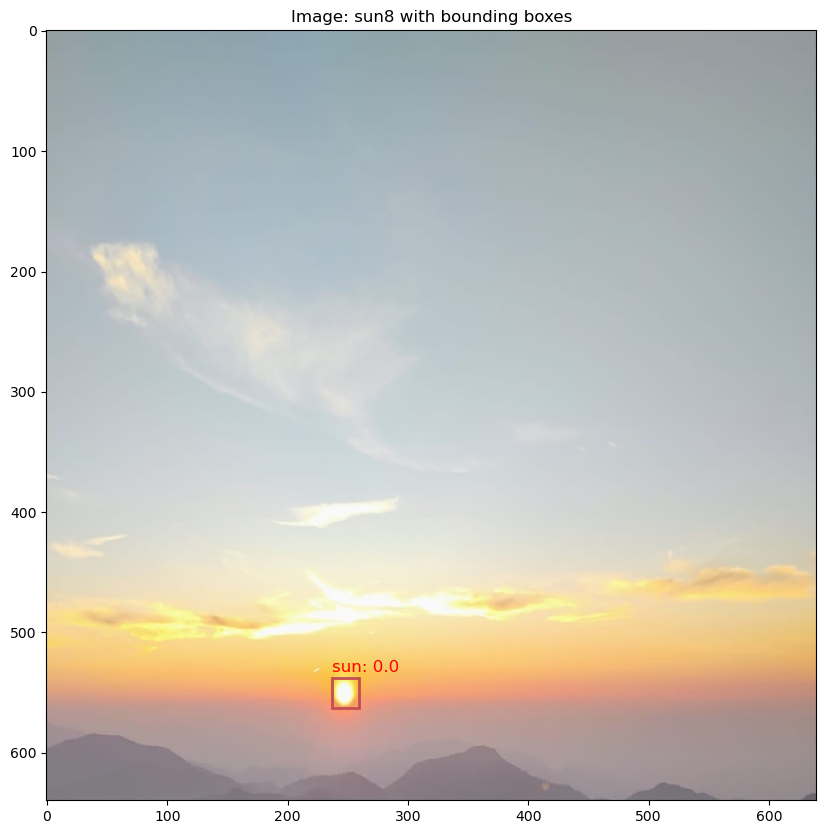

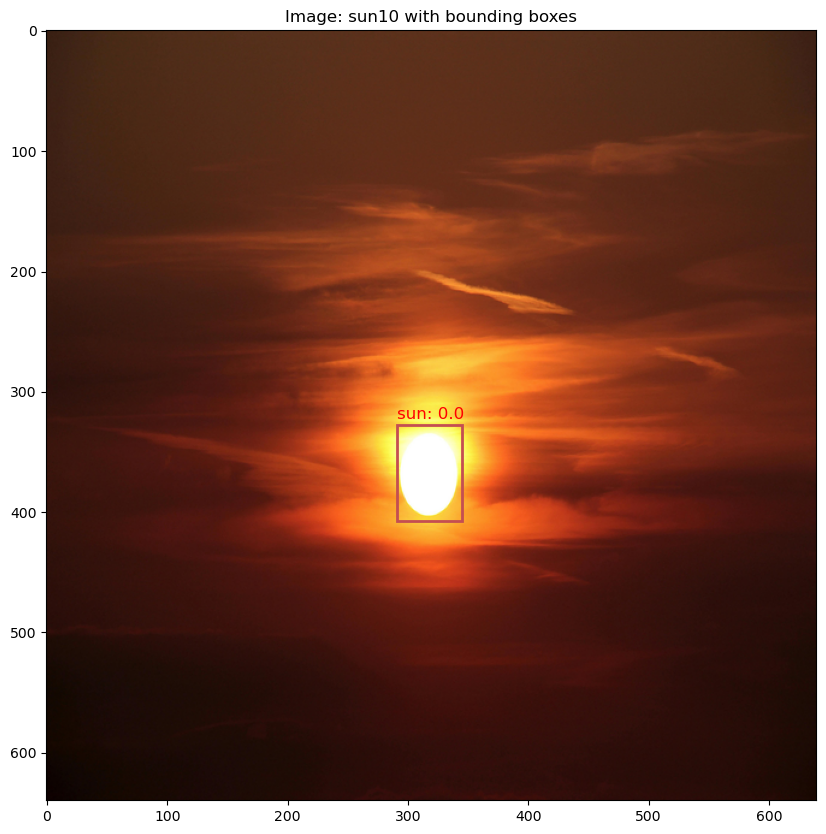

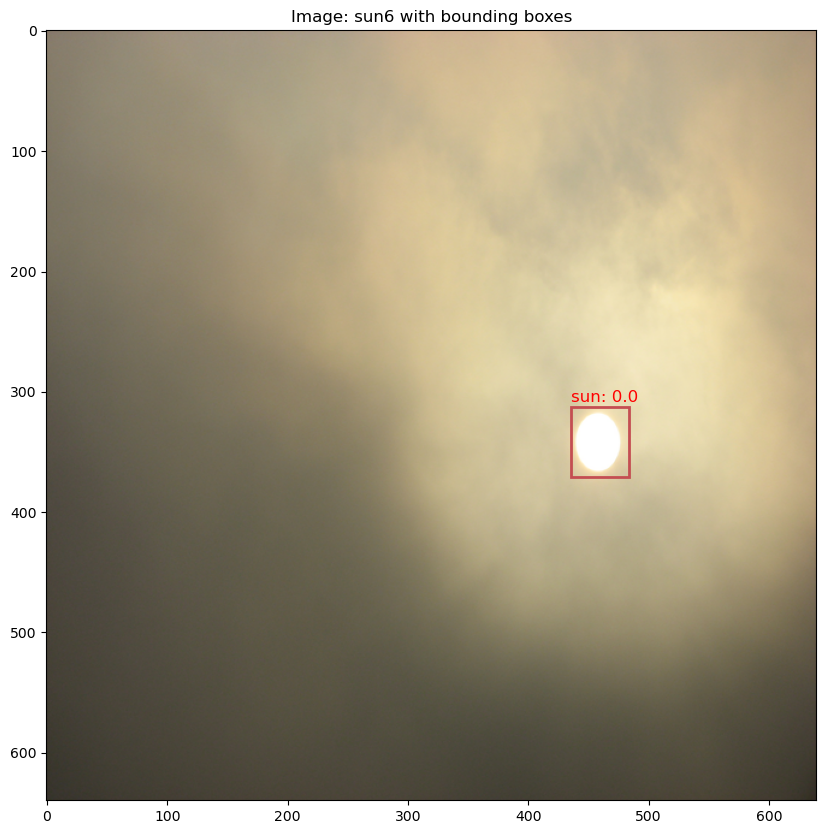

In [37]:
def visualize_labels(img_id, split='train'):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    # Load image
    img_path = os.path.join(image_out, split, img_id + '.png')
    img = Image.open(img_path)
    
    # Load label
    label_path = os.path.join(label_out, split, img_id + '.txt')
    with open(label_path, 'r') as f:
        labels = f.readlines()
    
    # Create figure and axis
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.imshow(img)
    
    # Convert YOLO format to box coordinates and draw
    for label in labels:
        cls_id, x_center, y_center, w, h = map(float, label.strip().split())
        x_center *= img_size[0]
        y_center *= img_size[1]
        w *= img_size[0]
        h *= img_size[1]
        
        x1 = x_center - w/2
        y1 = y_center - h/2
        
        rect = patches.Rectangle((x1, y1), w, h, linewidth=2, 
                               edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        # Add label text
        plt.text(x1, y1-5, f'sun: {cls_id}', color='red', fontsize=12)
    
    plt.axis('on')
    plt.title(f'Image: {img_id} with bounding boxes')
    plt.show()

# Test on first few training images
for img_id in train_ids[:3]:  # Show first 3 images
    visualize_labels(img_id)
    plt.close()  # Clear the current figure

In [6]:
%matplotlib inline

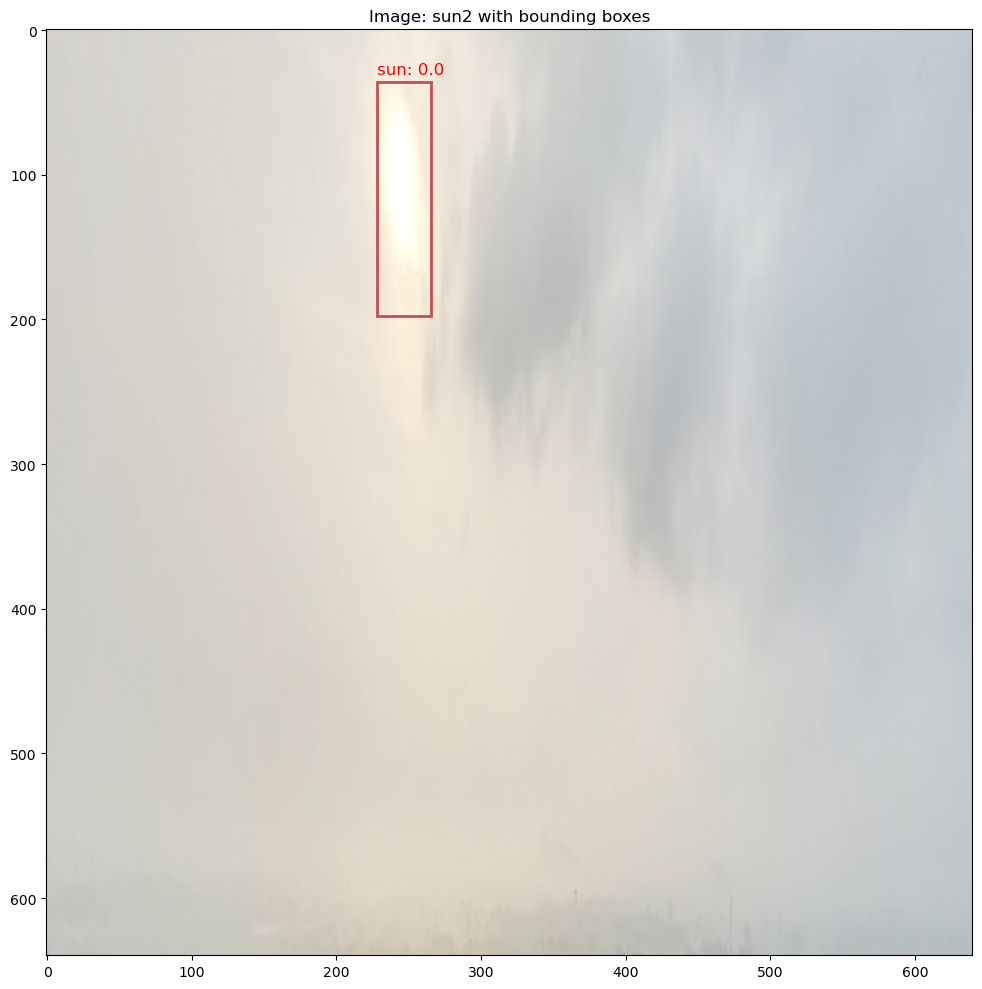

In [39]:
def visualize_labels(img_id, split='val'):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    # Load image
    img_path = os.path.join(image_out, split, img_id + '.png')
    img = Image.open(img_path)
    
    # Load label
    label_path = os.path.join(label_out, split, img_id + '.txt')
    with open(label_path, 'r') as f:
        labels = f.readlines()
    
    # Create figure and axis with specific DPI for better display
    plt.figure(figsize=(10, 10), dpi=100)
    ax = plt.gca()
    ax.imshow(img)
    
    # Convert YOLO format to box coordinates and draw
    for label in labels:
        cls_id, x_center, y_center, w, h = map(float, label.strip().split())
        x_center *= img_size[0]
        y_center *= img_size[1]
        w *= img_size[0]
        h *= img_size[1]
        
        x1 = x_center - w/2
        y1 = y_center - h/2
        
        rect = patches.Rectangle((x1, y1), w, h, linewidth=2, 
                               edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x1, y1-5, f'sun: {cls_id}', color='red', fontsize=12)
    
    plt.axis('on')
    plt.title(f'Image: {img_id} with bounding boxes')
    plt.tight_layout()
    plt.show()
    plt.close()  # Clear the figure after showing

# Test visualization on one image at a time
if val_ids:
    visualize_labels(val_ids[-1])


image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun1.png: 640x640 1 sun, 33.2ms
Speed: 4.2ms preprocess, 33.2ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun2.png: 640x640 1 sun, 42.1ms
Speed: 4.1ms preprocess, 42.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\karth\OneDrive\Documents\GitHub\Solar_git\gk_stuff\images\yolo_dataset\images\val\sun9.png: 640x640 1 sun, 22.6ms
Speed: 3.5ms preprocess, 22.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


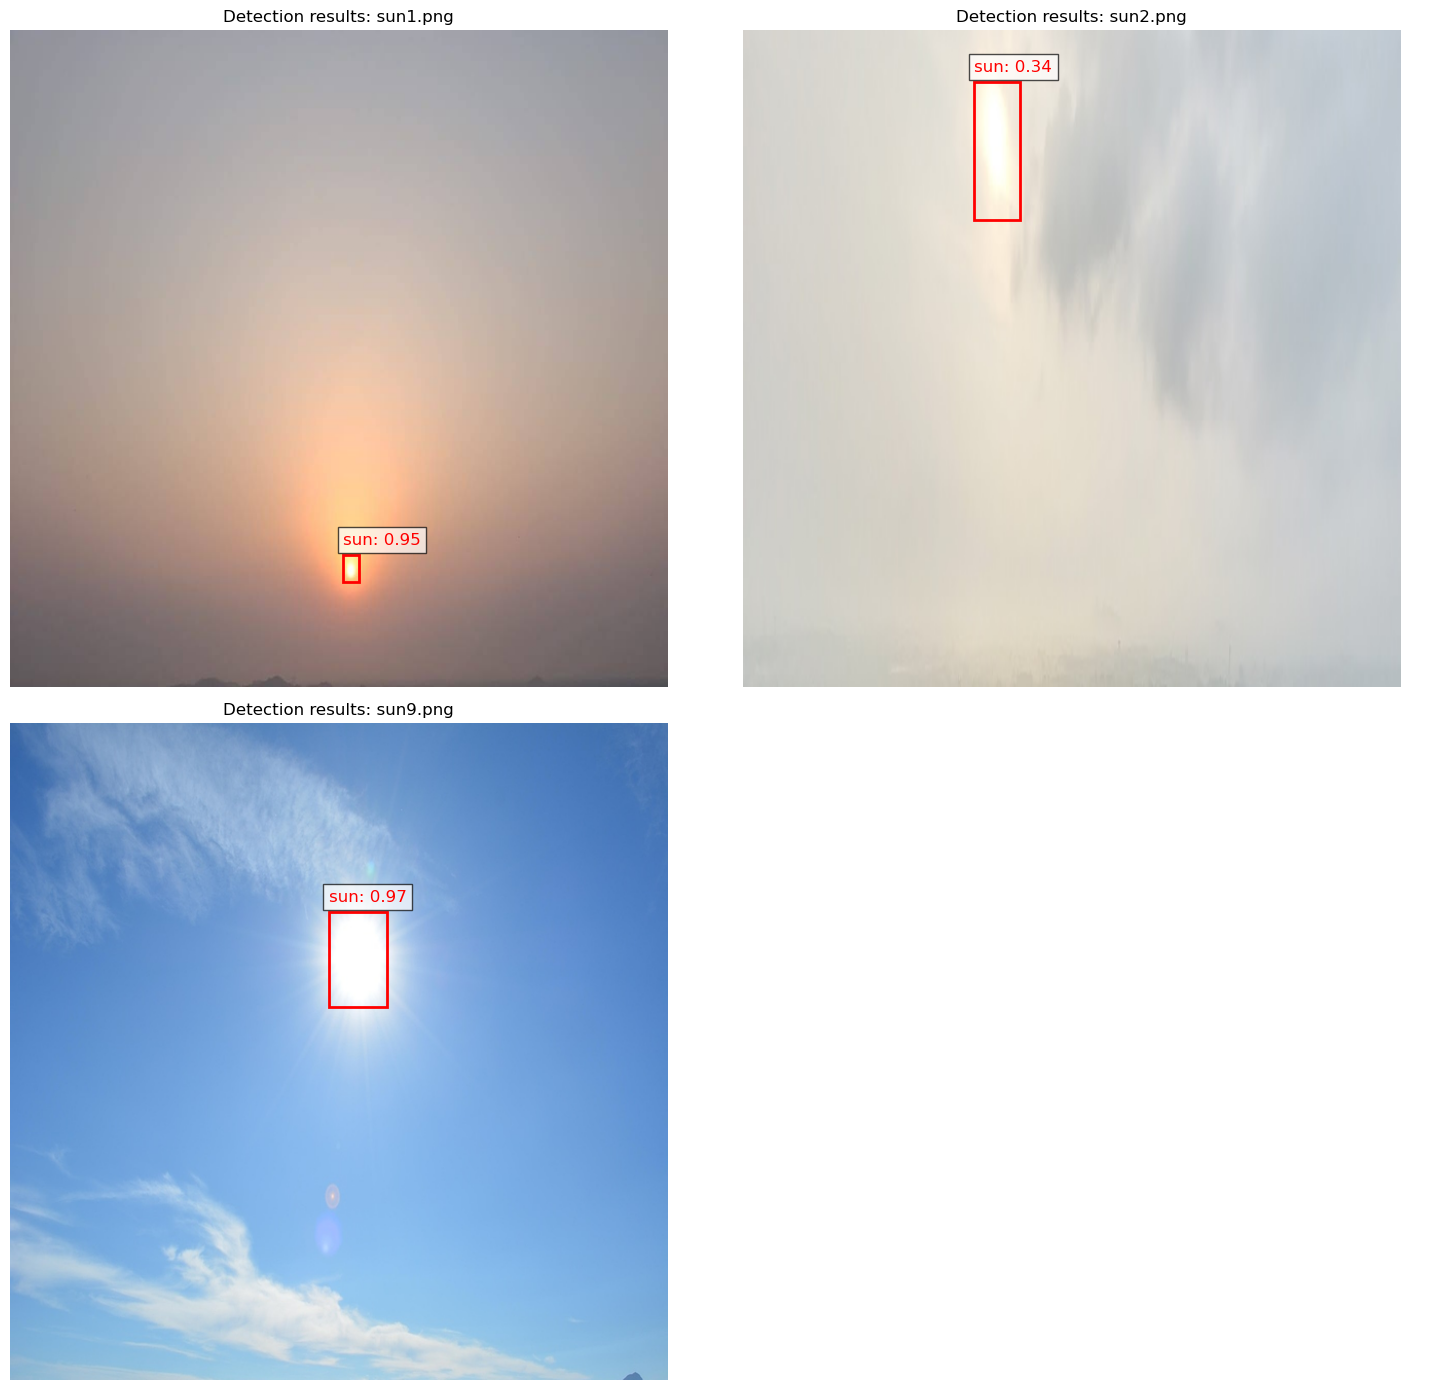

In [8]:
def visualize_predictions(model, num_images=4, conf_threshold=0.25):
    from pathlib import Path
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Get validation images
    val_img_dir = Path(output_dir) / 'images' / 'val'
    val_images = list(val_img_dir.glob('*.png'))[:num_images]
    
    # Create subplot grid
    rows = int(np.ceil(len(val_images) / 2))
    fig, axes = plt.subplots(rows, 2, figsize=(15, 7*rows))
    axes = axes.ravel() if len(val_images) > 2 else [axes] if len(val_images) == 1 else axes
    
    for idx, img_path in enumerate(val_images):
        # Get predictions with confidence threshold
        results = model.predict(str(img_path), conf=conf_threshold)[0]
        
        # Get the image and plot it
        img = plt.imread(str(img_path))
        axes[idx].imshow(img)
        
        # Plot each detection
        boxes = results.boxes
        for box in boxes:
            # Get box coordinates and confidence
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = float(box.conf[0].cpu().numpy())
            
            # Create rectangle patch
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                               fill=False, color='red', linewidth=2)
            axes[idx].add_patch(rect)
            
            # Add confidence text above box
            axes[idx].text(x1, y1-10, f'sun: {conf:.2f}',
                         color='red', fontsize=12, 
                         bbox=dict(facecolor='white', alpha=0.7))
        
        axes[idx].set_title(f'Detection results: {img_path.name}')
        axes[idx].axis('off')
    
    # Hide empty subplots if any
    for idx in range(len(val_images), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Run visualization with lower confidence threshold
visualize_predictions(model, conf_threshold=0.1)